# Unit 5 - Financial Planning

In [82]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [83]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [84]:
# Create a variable named monthly_income, and set its value to 12000.

# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

eth_url = eth_url + "?format=json"
btc_url = btc_url + "?format=json"
# YOUR CODE HERE!
# Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.
btc_price = requests.get(btc_url)
eth_price = requests.get(eth_url)

# Navigate the JSON response object to access the current price of each coin, and store each in a variable.

response_data = requests.get(btc_url).json()

btc_data = btc_price.json()
eth_data = eth_price.json()



# Create a variable named monthly_income, and set its value to 12000.
monthly_income = 120000
# Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.




In [85]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
total_btc_value = my_btc * btc_price
total_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth:0.2f}")

The current value of your 1.2 BTC is $1.20
The current value of your 5.3 ETH is $5.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [86]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [87]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")
alpaca_base_url = "https://paper-api.alpaca.markets"

In [88]:
alpaca_api_key
alpaca_secret_key

'Tqb3f0M2Bv6z1mak7IGnNiN3Zeidq6SYRdoNXrNg'

In [89]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    alpaca_base_url,
    api_version = "v2"
)

account = api.get_account()
print(account)

Account({   'account_blocked': False,
    'account_number': 'PA3M23VL74J7',
    'accrued_fees': '0',
    'buying_power': '200000',
    'cash': '100000',
    'created_at': '2022-08-16T20:40:17.127995Z',
    'crypto_status': 'ACTIVE',
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '100000',
    'id': '7594aa52-22ca-48dc-89b9-9c4eab06f1d7',
    'initial_margin': '0',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '100000',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'portfolio_value': '100000',
    'regt_buying_power': '200000',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '100000',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})


In [90]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio.head()
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG
SPY

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
combined_df = pd.concat([AGG,SPY], axis=1, keys=['AGG', 'SPY'],)
combined_df
# Preview DataFrame
# YOUR CODE HERE!

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-10-21 04:00:00+00:00  117.59  117.64  117.48  117.51  3688494   

                                                      SPY                   \
                          trade_count        vwap    open      high    low   
timestamp                                                                    
2020-10-21 04:00:00+00:00       13398  117.547939  343.36  348.6847  342.4   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-10-21 04:00:00+00:00  342.73  63574979      410236  343.667472

In [91]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = combined_df['AGG']['close'].item()
spy_close_price = combined_df["SPY"]["close"].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.51
Current SPY closing price: $342.73


In [92]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy 
my_agg_value = agg_close_price * my_agg


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17136.50
The current value of your 200 AGG shares is $23502.00


### Savings Health Analysis

In [93]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto = total_btc_value + total_eth_value
shares = my_agg_value + my_spy_value
savings_data = {"amount":[crypto, shares]}
index_data = ["crypto", "shares"]
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings_data, index=index_data)
# Display savings DataFrame
display(df_savings)

,amount
crypto,34218.424
shares,40638.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

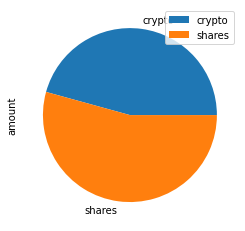

In [94]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [96]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [97]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
df_stock_data
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys =['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [98]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [99]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [100]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ericondarza/Desktop/UM-MIA-FINTECH/Module 5 Challenge /Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004109,1.002904,1.002831,1.010402,1.007071,0.991836,0.999007,1.003194,1.004468,1.013286,...,0.993172,1.003795,1.003324,1.010451,1.005769,0.997876,1.002334,0.996691,0.992081,1.002923
2,1.006834,0.997013,0.999331,1.013365,1.011012,0.994641,1.008431,1.001465,1.000879,1.016179,...,0.985632,1.001559,0.997401,1.006777,0.997015,0.988416,1.004049,0.989170,0.987887,0.988456
3,0.996393,0.999515,1.005087,1.003059,1.022139,1.005974,1.006688,1.005742,1.003928,1.007488,...,0.986012,1.003690,0.997899,1.008217,0.991163,0.994431,0.995072,0.996930,0.981867,0.977197
4,0.995703,1.007353,0.997220,1.002155,1.022966,1.016802,1.014566,1.017598,1.015191,1.001533,...,0.982610,1.008731,0.986997,1.019620,0.978539,0.990127,0.991456,0.987592,0.986455,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.130981,12.466290,3.373462,5.281353,29.263930,23.087184,33.333240,21.076524,29.020471,35.802227,...,13.103765,36.450537,12.630130,8.121106,40.303723,8.372059,11.447380,24.300648,28.519184,35.961813
7557,8.181548,12.518675,3.386518,5.282916,29.557634,23.107537,33.087280,21.202633,28.895982,35.835888,...,13.127173,36.802684,12.731326,8.164600,40.279999,8.382832,11.601725,24.321492,28.368816,36.091749
7558,8.103093,12.684220,3.398585,5.331726,29.395004,23.342421,33.068733,21.171950,28.833250,35.750981,...,13.195838,36.743301,12.586165,8.127230,40.318322,8.389755,11.641748,24.218691,28.360043,35.933434
7559,8.008162,12.533615,3.407374,5.405270,29.408494,22.983928,32.931884,21.088286,29.087099,35.384418,...,13.114409,36.441507,12.395209,8.152801,40.698981,8.370870,11.659334,24.455788,28.310490,36.433569


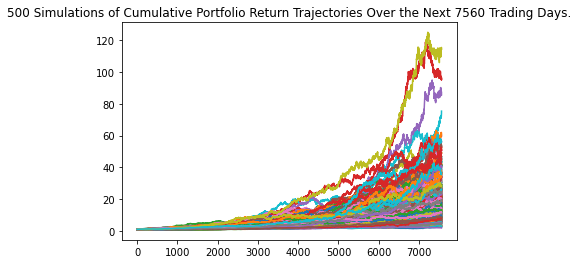

In [101]:
# Plot simulation outcomes
line_plot_30_year = MC_30_year.plot_simulation()

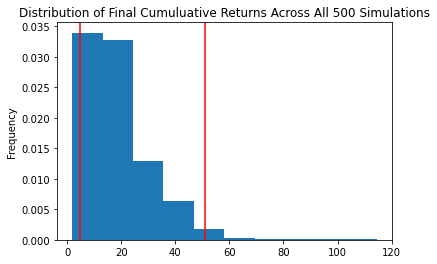

In [102]:
# Plot probability distribution and confidence intervals
dist_plot_30_year = MC_30_year.plot_distribution()

### Retirement Analysis

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
sumstats_30yr = MC_30_year.summarize_cumulative_return()

# Print summary statistics
sumstats_30yr 

count           500.000000
mean             19.238216
std              13.030777
min               1.858946
25%              10.033753
50%              16.077753
75%              24.371826
max             114.408343
95% CI Lower      4.654591
95% CI Upper     51.056801
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [104]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sumstats_30yr[8]*initial_investment,2)
ci_upper = round(sumstats_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93091.82 and $1021136.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [105]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sumstats_30yr[8]*initial_investment,2)
ci_upper = round(sumstats_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139637.74 and $1531704.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,

    num_trading_days = 252*5
)

In [107]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ericondarza/Desktop/UM-MIA-FINTECH/Module 5 Challenge /Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999169,0.997880,1.003281,0.988945,1.000799,0.987545,1.004530,1.009120,1.016538,0.983297,...,1.004935,0.997100,1.011533,0.993717,0.989718,0.990961,1.004430,1.005972,1.009632,0.997768
2,0.989193,1.004181,1.003328,0.998459,1.016369,0.976802,0.993166,1.023665,1.021453,0.969532,...,1.012437,0.999096,1.023906,0.985612,0.987765,0.999677,1.027251,0.991563,1.016617,1.012098
3,0.979903,1.020090,0.993254,0.995053,1.011198,0.979380,1.015954,1.040293,1.029677,0.959569,...,1.024240,0.998573,1.034195,0.970141,0.987174,1.011359,1.051861,0.998173,1.011851,1.017415
4,0.983517,1.015983,0.980264,0.993478,1.015635,0.988238,1.014843,1.022953,1.041473,0.957504,...,1.040737,1.004834,1.034276,0.965539,1.007344,1.013345,1.046086,0.992261,1.008223,1.020323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.135541,2.029632,1.631224,1.558045,2.642425,1.510845,2.787809,2.129739,1.318967,1.397800,...,1.828659,1.968304,2.587125,1.196768,2.134223,1.563534,1.257577,1.488577,2.098798,2.414271
1257,1.142257,2.041678,1.636544,1.553644,2.616699,1.511647,2.840719,2.086244,1.326134,1.394148,...,1.840845,1.988221,2.596988,1.209608,2.133988,1.541685,1.244212,1.504936,2.117859,2.435194
1258,1.143257,2.031845,1.657576,1.525743,2.607237,1.528641,2.845059,2.114901,1.340545,1.382840,...,1.842154,1.995207,2.596155,1.206905,2.156083,1.553801,1.231088,1.501521,2.102941,2.438446
1259,1.149437,2.049748,1.710926,1.512794,2.632772,1.513690,2.877314,2.088577,1.354428,1.376468,...,1.852057,2.016476,2.579005,1.205846,2.169243,1.562765,1.228311,1.515899,2.070708,2.449111


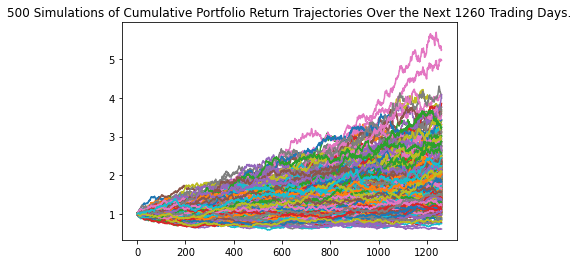

In [108]:
# Plot simulation outcomes
plot_MC_5_year = MC_5_year.plot_simulation()

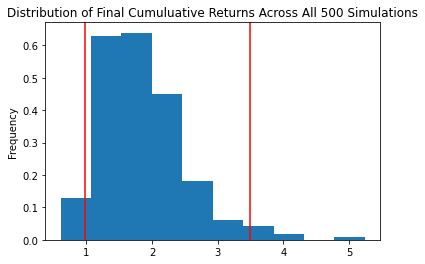

In [109]:
# Plot probability distribution and confidence intervals
distri_MC_5plot = MC_5_year.plot_distribution()

In [115]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_5yr = MC_5_year.summarize_cumulative_return()



# Print summary statistics
sum_stats_5yr

count           500.000000
mean              1.924030
std               0.646841
min               0.735158
25%               1.448467
50%               1.826566
75%               2.305111
max               4.351967
95% CI Lower      0.968985
95% CI Upper      3.412770
Name: 1260, dtype: float64

In [117]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stats_5yr[8]*initial_investment,2)
ci_upper_five = round(sum_stats_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58139.11 and $204766.19


### Ten Years Retirement Option

In [125]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [126]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010081,1.005168,1.004643,1.008715,0.998476,1.001127,1.012523,1.002342,1.006591,0.998568,...,1.000712,0.988863,0.984274,1.004290,0.991855,1.006084,1.004708,1.019428,0.993451,0.997846
2,1.000059,0.997874,0.994085,1.022050,1.010457,1.016471,1.008931,1.011208,1.000857,1.015680,...,0.993309,0.975619,0.959937,1.005237,1.005820,1.014194,0.995714,1.029721,1.002252,0.981639
3,0.995914,1.008297,1.000221,1.002022,0.997012,1.020294,1.017372,1.011612,1.012702,1.026914,...,1.001615,0.956404,0.980659,1.023331,1.008421,1.016635,0.992418,1.019034,1.012871,0.984921
4,1.000478,1.005142,0.980126,0.998925,1.009840,1.016170,1.028388,1.011913,1.007822,1.033550,...,1.000863,0.947671,0.989463,1.020741,1.024032,1.005740,0.993943,1.029309,1.032509,0.985170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.140815,4.874641,2.249958,3.791626,7.034678,1.346446,3.633029,2.775514,1.830701,3.102238,...,3.583330,2.258558,2.491061,2.348789,5.522758,4.291847,2.481974,5.705847,5.857639,3.069963
2517,3.158267,4.944641,2.258504,3.801270,7.119485,1.353090,3.589559,2.816553,1.856220,3.173338,...,3.620502,2.242048,2.507196,2.375944,5.573098,4.299360,2.481489,5.655092,5.937293,3.001621
2518,3.167220,5.003824,2.271949,3.786534,7.020760,1.334994,3.570613,2.810786,1.877320,3.167690,...,3.639176,2.281193,2.535753,2.367259,5.603602,4.293270,2.475943,5.647761,5.963824,3.000942
2519,3.137053,5.018837,2.263068,3.757300,7.017409,1.339634,3.514918,2.790680,1.876046,3.198937,...,3.573555,2.274987,2.533890,2.361586,5.619233,4.341178,2.509324,5.597423,6.041158,2.972093


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

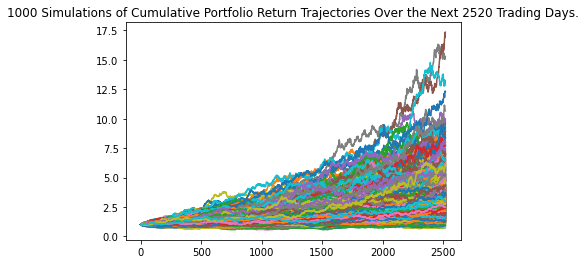

In [127]:
# Plot simulation outcomes
MC_10_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

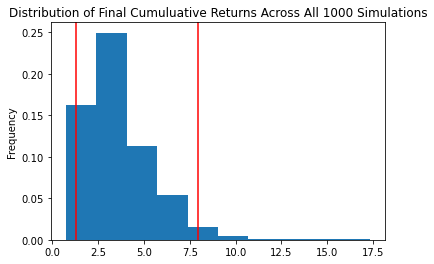

In [128]:
# Plot probability distribution and confidence intervals
MC_10_year.plot_distribution()

In [130]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_10yr = MC_10_year.summarize_cumulative_return()
# Print summary statistics
sum_stats_10yr

count           1000.000000
mean               3.607064
std                1.845888
min                0.729334
25%                2.335632
50%                3.167870
75%                4.596359
max               17.348498
95% CI Lower       1.263024
95% CI Upper       7.946768
Name: 2520, dtype: float64

In [132]:
# Set initial investment
initial_investment = 20000 * 3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stats_10yr[8]*initial_investment,2)
ci_upper_ten = round(sum_stats_10yr[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $75781.45 and $476806.1
